In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
super_covid = pd.read_csv('super_covid_data-1.csv')

super_covid.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826


In [43]:
vermont_data = super_covid[super_covid['State_x'] == 'VT']

columns_cases = [col for col in vermont_data if col.endswith('x') and '2020-07' <= col.split('_')[0] <= '2020-12']
columns_deaths = [col for col in vermont_data if col.endswith('y') and '2020-07' <= col.split('_')[0] <= '2020-12']

def calculate_weekly_stats(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W')).agg(['mean', 'median', lambda x: x.mode().iloc[0]])
    weekly_data.columns = weekly_data.columns.droplevel()
    weekly_data.columns = ['mean', 'median', 'mode']
    return weekly_data

weekly_cases_stats = calculate_weekly_stats(vermont_data, columns_cases)
weekly_deaths_stats = calculate_weekly_stats(vermont_data, columns_deaths)

print("Weekly Cases Stats:")
print(weekly_cases_stats.head()) 
print("\nWeekly Deaths Stats:")
print(weekly_deaths_stats.head())


Weekly Cases Stats:
                  mean  median  mode
date                                
2020-07-05   87.628571    50.0    10
2020-07-12   90.336735    51.0    10
2020-07-19   94.193878    53.5     5
2020-07-26   97.918367    57.0    14
2020-08-02  100.255102    59.0    14

Weekly Deaths Stats:
                mean  median  mode
date                              
2020-07-05  4.000000     1.0     0
2020-07-12  4.000000     1.0     0
2020-07-19  4.000000     1.0     0
2020-07-26  4.000000     1.0     0
2020-08-02  4.030612     1.0     0


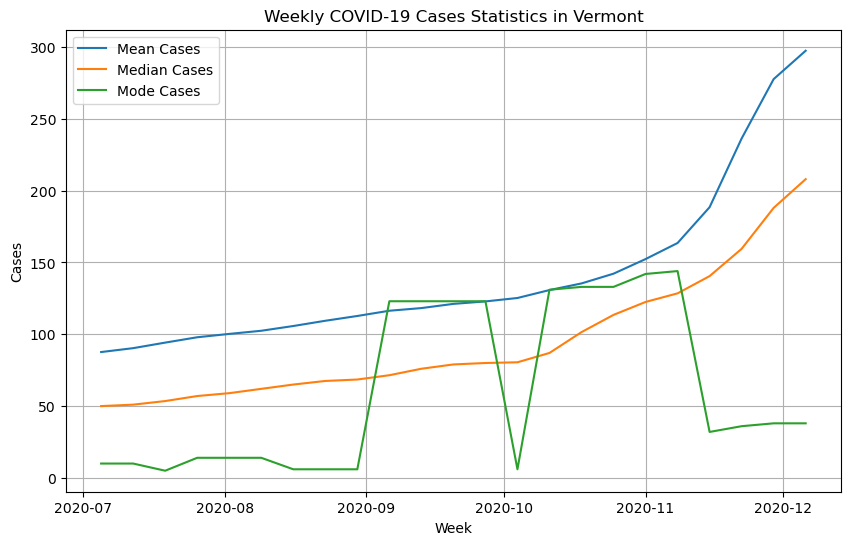

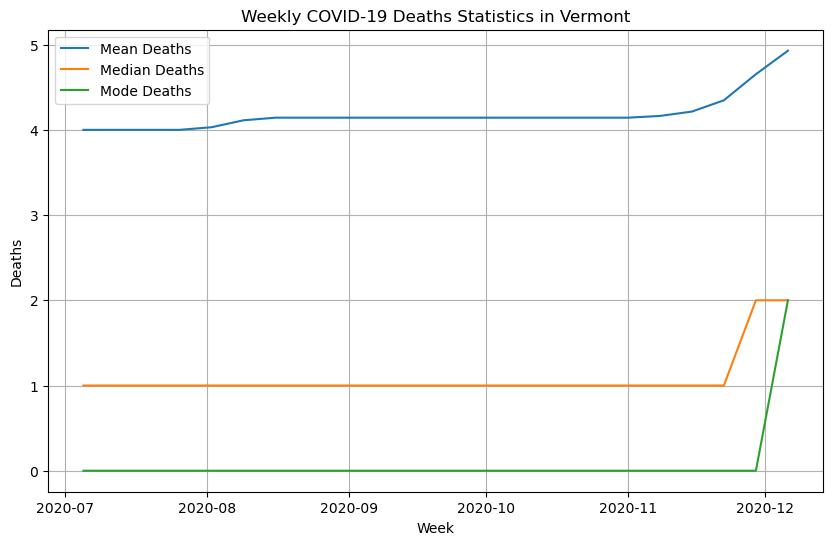

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mean'], label='Mean Cases')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['median'], label='Median Cases')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mode'], label='Mode Cases')
plt.title('Weekly COVID-19 Cases Statistics in Vermont')
plt.xlabel('Week')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()

# Plot weekly statistics for deaths
plt.figure(figsize=(10, 6))
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mean'], label='Mean Deaths')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['median'], label='Median Deaths')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mode'], label='Mode Deaths')
plt.title('Weekly COVID-19 Deaths Statistics in Vermont')
plt.xlabel('Week')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

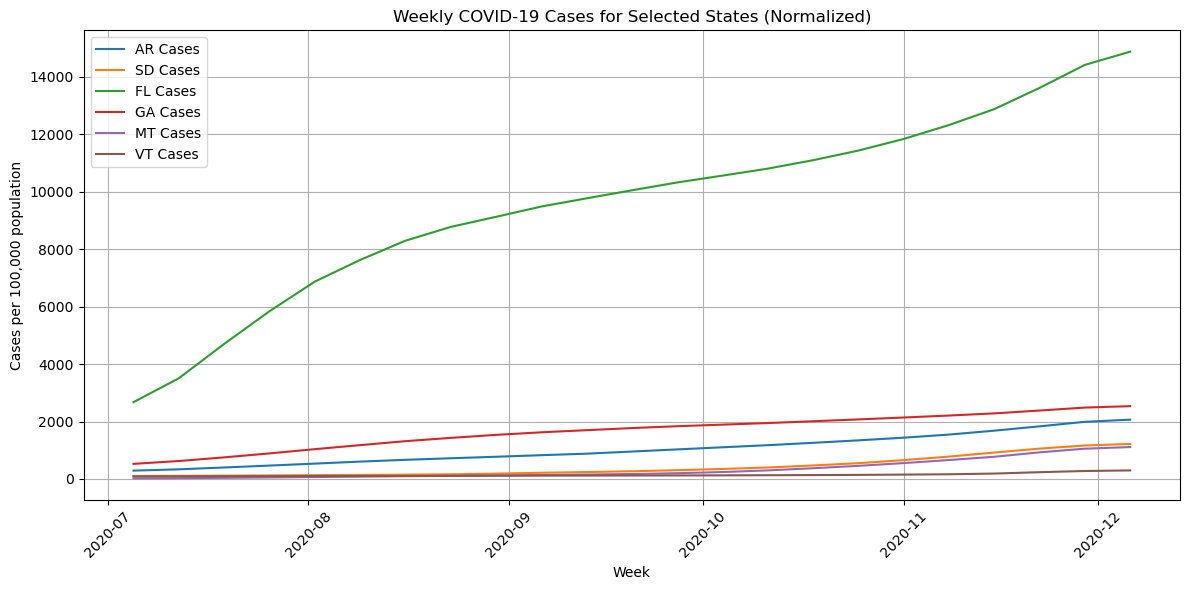

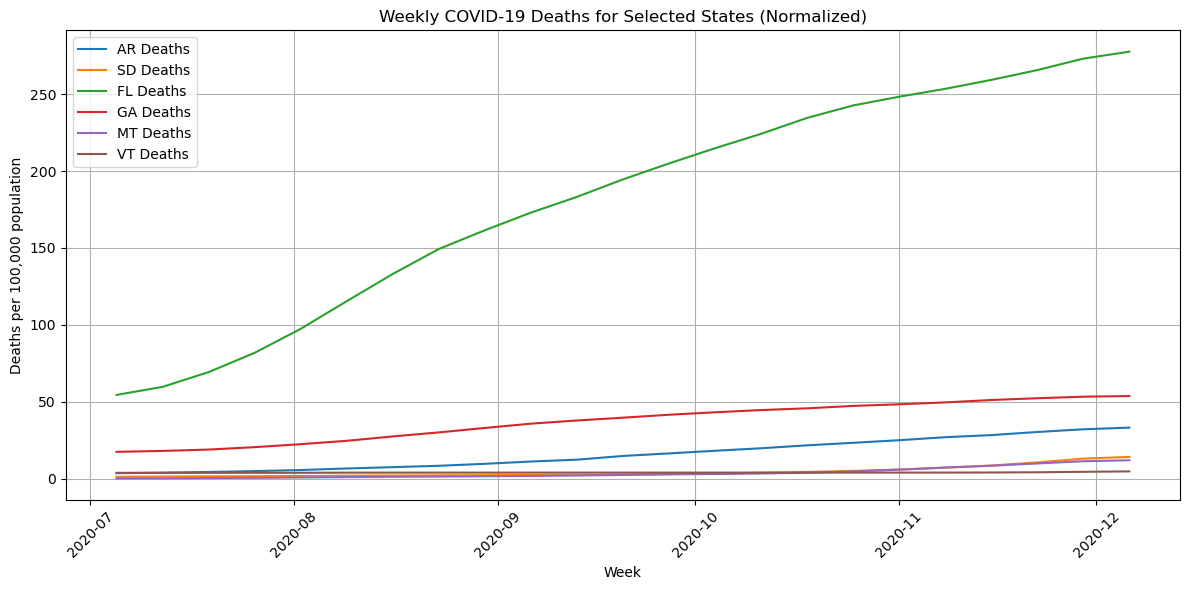

In [47]:
# Step 1: Normalize the COVID-19 data by population
# You'll need population data for each state, let's assume you have a dictionary called state_population
state_population = {'Arkansas': 3017825, 'South Dakota': 892717, 'Florida': 21477737, 
                    'Georgia': 10617423, 'Montana': 1068778, 'Vermont': 623989}

# Assuming your data includes 'Population' column representing population for each state
for state, population in state_population.items():
    vermont_data.loc[vermont_data['State_x'] == state, columns_cases] /= (population / 100000)
    vermont_data.loc[vermont_data['State_x'] == state, columns_deaths] /= (population / 100000)

# Step 2: Select the data for the states you want to compare
selected_states = ['AR', 'SD', 'FL', 'GA', 'MT', 'VT']

# Step 3: Calculate weekly statistics for each state
weekly_cases_stats = {}
weekly_deaths_stats = {}

for state in selected_states:
    state_data = super_covid[super_covid['State_x'] == state]
    weekly_cases_stats[state] = calculate_weekly_stats(state_data, columns_cases)
    weekly_deaths_stats[state] = calculate_weekly_stats(state_data, columns_deaths)

# Step 4: Plot the normalized data for the selected states in a line plot
plt.figure(figsize=(12, 6))

for state in selected_states:
    plt.plot(weekly_cases_stats[state]['mean'], label=f'{state} Cases')

plt.title('Weekly COVID-19 Cases for Selected States (Normalized)')
plt.xlabel('Week')
plt.ylabel('Cases per 100,000 population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Separate graph for deaths
plt.figure(figsize=(12, 6))

for state in selected_states:
    plt.plot(weekly_deaths_stats[state]['mean'], label=f'{state} Deaths')

plt.title('Weekly COVID-19 Deaths for Selected States (Normalized)')
plt.xlabel('Week')
plt.ylabel('Deaths per 100,000 population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
vermont_data = super_covid[super_covid['State_x'] == 'VT'].copy()

start_date = '2020-07-01'
end_date = '2020-12-31'

cases_columns = [col for col in vermont_data.columns if col >= start_date and col <= end_date]
deaths_columns = [col for col in vermont_data.columns if col >= start_date and col <= end_date]

vermont_data['total_cases'] = vermont_data[cases_columns].sum(axis=1)
vermont_data['total_deaths'] = vermont_data[deaths_columns].sum(axis=1)

top_counties_cases = vermont_data.sort_values(by='total_cases', ascending=False).head(5)
top_counties_deaths = vermont_data.sort_values(by='total_deaths', ascending=False).head(5)

print("Top 5 Counties in Vermont by Total Cases (July 2020 - December 2020):")
print(top_counties_cases[['County Name_x', 'total_cases']])
print("\nTop 5 Counties in Vermont by Total Deaths (July 2020 - December 2020):")
print(top_counties_deaths[['County Name_x', 'total_deaths']])

Top 5 Counties in Vermont by Total Cases (July 2020 - December 2020):
           County Name_x  total_cases
2809  Chittenden County        204867
2817  Washington County         44240
2811    Franklin County         33944
2818     Windham County         30750
2816     Rutland County         29447

Top 5 Counties in Vermont by Total Deaths (July 2020 - December 2020):
           County Name_x  total_deaths
2809  Chittenden County         204867
2817  Washington County          44240
2811    Franklin County          33944
2818     Windham County          30750
2816     Rutland County          29447


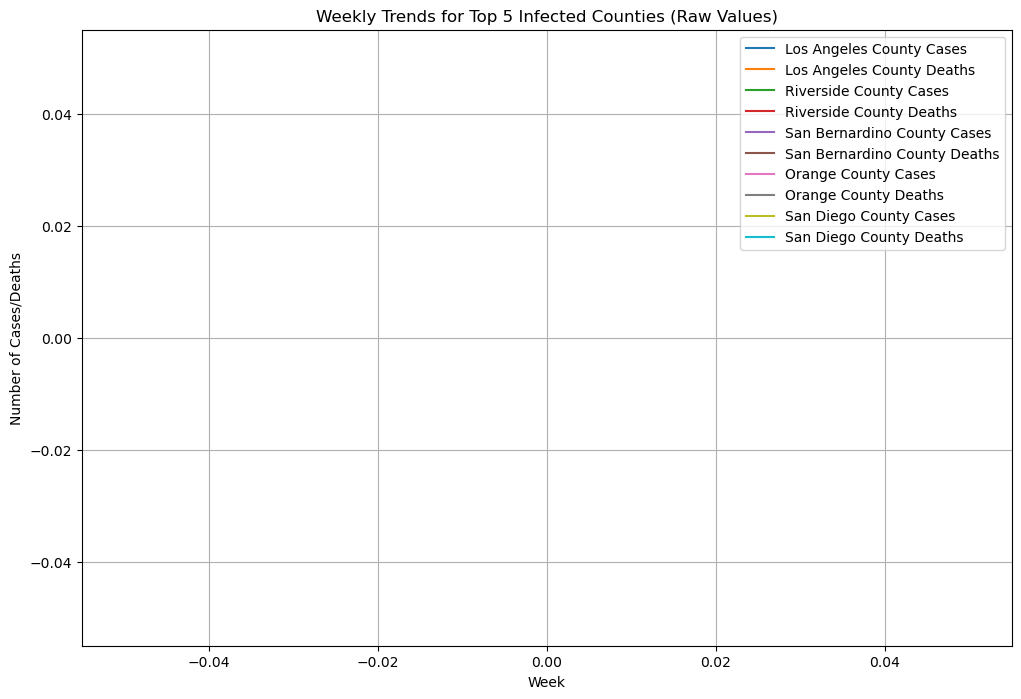

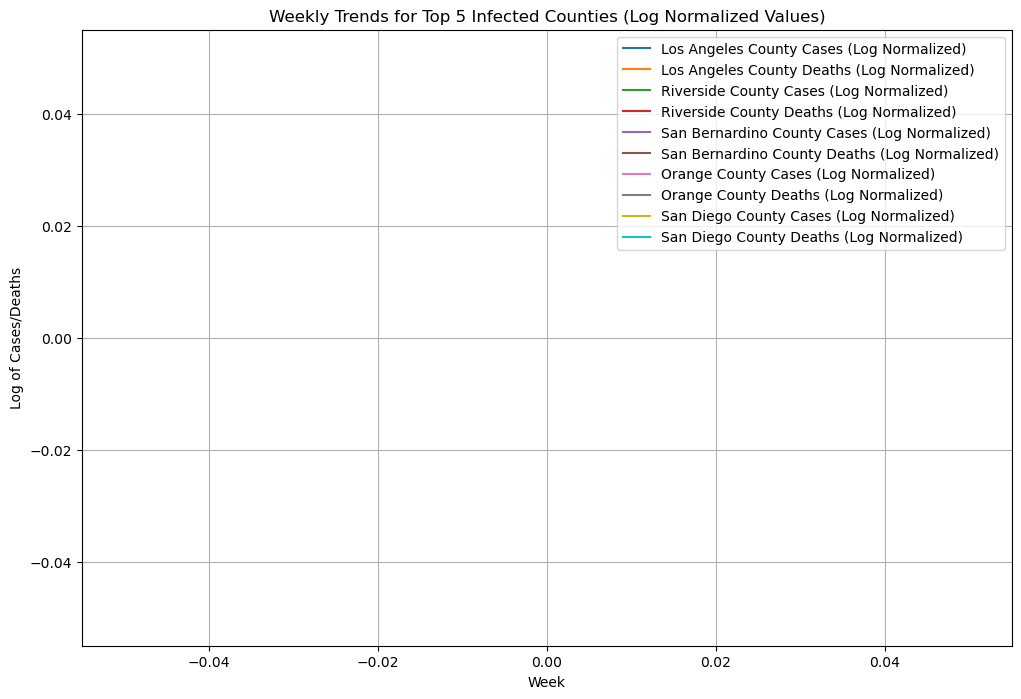

In [13]:
# Filter data for the top 5 infected counties
top_counties = ['Los Angeles County', 'Riverside County', 'San Bernardino County', 'Orange County', 'San Diego County']
top_counties_data = super_covid[super_covid['County Name_x'].isin(top_counties)]

# Define start and end dates
start_date = '2020-07-01'
end_date = '2020-12-31'

# Filter columns for the specified time frame
date_columns = pd.date_range(start=start_date, end=end_date)
columns_cases = [col for col in top_counties_data.columns if col in date_columns]
columns_deaths = [col for col in top_counties_data.columns if col in date_columns]

# Calculate weekly totals for cases and deaths
top_counties_data['weekly_cases'] = top_counties_data[columns_cases].sum(axis=1)
top_counties_data['weekly_deaths'] = top_counties_data[columns_deaths].sum(axis=1)

# Plot raw values for weekly cases and deaths
plt.figure(figsize=(12, 8))
for county in top_counties:
    county_data = top_counties_data[top_counties_data['County Name_x'] == county]
    plt.plot(county_data['weekly_cases'], label=f'{county} Cases')
    plt.plot(county_data['weekly_deaths'], label=f'{county} Deaths')

plt.title('Weekly Trends for Top 5 Infected Counties (Raw Values)')
plt.xlabel('Week')
plt.ylabel('Number of Cases/Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Plot log normalized values for weekly cases and deaths
plt.figure(figsize=(12, 8))
for county in top_counties:
    county_data = top_counties_data[top_counties_data['County Name_x'] == county]
    plt.plot(np.log10(county_data['weekly_cases']), label=f'{county} Cases (Log Normalized)')
    plt.plot(np.log10(county_data['weekly_deaths']), label=f'{county} Deaths (Log Normalized)')

plt.title('Weekly Trends for Top 5 Infected Counties (Log Normalized Values)')
plt.xlabel('Week')
plt.ylabel('Log of Cases/Deaths')
plt.legend()
plt.grid(True)
plt.show()